# MSDS 7331 Data Mining Lab 1
Professor: Dr. Jake Drew  
Team: Steven Hayden, Josephine MacDaniel, Korey MacVittie, Afreen Siddiqui, Eduardo Cantu

## Overview of Changes for Resubmission
Text included for resubmission will be in <font color=blue>blue</font> (this section exempted, of course).

Several sections of the notebook that were originally submitted in code format, which contained only plain text, have been converted to markdown format. These sections are unmarked, but this is noted for completion's sake.

During modifications for resubmission, some sections were rerun which resulted in slightly different results from what was originally submitted. While the specific figures for these sections have been changed throughout the document to reflect this, the conclusions were unchanged (that is, no values changed relative to each other).

The size of some figures has been modified to better fit the width of the screen.

We have included a more concise statement of our goals in the **Business Understanding** section.

We have modified the table in the **Data Meaning Type** section, which now includes a *Data Type* column, and is also presented in a much more readable format.

In the **Data Quality** section, we have mentioned some fields that had missing, invalid, or otherwise non-meaningful data, and how we intended to deal with them as they arose.

The first code section in **Simple Statistics** has a cleaner, more clear output.

In our **Visualize Attributes** section, the box plot and violin plot were originally comparing against the *consecutive number* factor, which we have determined is not relevant to the actual data but is essentially a unique identifier. These tables have been modified to reflect *hour_of_crash* and *number_of_fatalities*, respectively, to produce more useful information (and correspondingly we have included more analysis thereof).

The **Explore Attributes and Class** section has been expanded with several additional boxplots, with their analysis included in <font color=blue>blue</font> text.

The **New Features** section includes additional information on what sort of information we would find helpful in future analysis with this data set, or further areas of study that would help make sense of what we have found.

The **Exceptional Work** section, while it has been brought to our attention in its insufficiency, has been included for posterity.

In [4]:
import pandas as pd
import numpy as np
import seaborn as seaborn
import matplotlib.pyplot as plt
import matplotlib as mp1
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Business Understanding
The data we are examining is US traffic fatality data taken over the course of 2016, which includes a diverse set of data regarding each crash. This is useful information: accidents are rated as one of the most likely causes of death in the US, and armed with a better understanding of their causes, we could possibly find ways to reduce risk.

With this data, our goal is to build models that will allow us to predict the likelihood of fatal vehicular accidents under a variety of conditions and in a variety of circumstances. For instance, if we find a relationship between precipitation and fatalities, we could then presumably conclude that driving in rain or snow has a greater chance of leading to a fatal crash. Driving courses, communities, and governmental agencies could use these models to better prepare individuals in how to dive safely in unsafe conditions - but to do so, they must know what conditions are most likely to contribute to the rate of fatal accidents, to better target such training.

<p><font color=blue>Specifically, our response variable will be the number of fatalities: by looking for correlations between fatalities and the conditions in which those fatalities occurred, our goal is to uncover what conditions are more likely to result in fatal accidents. We will use regression to help understand these relationships and their impact to fatalities. Only significant attributes will be induced in the model by using a model selection technique. The validity of the regression model will be measured using standard cross validation practice. </font>

In this instance, a good prediction algorithm would be one that can accurately weigh each of the various factors that go into driving conditions and determine the likelihood of a fatal accident.

## Data Meaning Type
In this section, we will go over the attributes in our data set, and explain each. These descriptions are taken from the kaggle site for this data, found [here](https://www.kaggle.com/usdot/nhtsa-traffic-fatalities).

<font color=blue><p><p>There are quite a few variables here - however, many of them are redundant with each other. As should not be surprising when governmental bureaucracy is involved, there are a variety of variables here that are "encoded" and redundant with one another. Much of the information relates to the location of the accident: latitude, longitude, type of roadway, nearest mile marker, type of intersection, and so forth.</font>

| Variable Name | Data Type | Description |
| :- | :- | :- |
| state_number | Interval | Identifies the state in which the crash occurred. The codes are from the General Services Administration’s (GSA) publication of worldwide Geographic Location Codes (GLC). For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| state_name | Nominal | Identifies the state in which the crash occurred. The codes are from the General Services Administration’s (GSA) publication of worldwide Geographic Location Codes (GLC). |
| consecutive_number | Interval | Unique case number assigned to each crash. It appears on each data file and is used to merge information from the data files together. xxxxxx Two Characters for State Code followed by Four Characters for Case Number. |
| number_of_vehicle_forms_submitted_all | Interval | Count of the total number of vehicles involved. |
| number_of_motor_vehicles_in_transport_mvit | Interval | Count of the number of vehicles in-transport involved in the crash. Legally parked vehicles are not included. |
| number_of_parked_working_vehicles | Interval | Count of the number of parked and working vehicles involved in the crash. |
| number_of_forms_submitted_for_persons_not_in_motor_vehicles | Interval | Number of Person Forms (Not a Motor Vehicle Occupant) that are applicable to this case (i.e., non-occupants). |
| number_of_persons_not_in_motor_vehicles_in_transport_mvit | Interval | Count of the number of non-motorists in the crash. A non-motorist is defined as a pedestrian, a cyclist, an occupant of a motor vehicle not intransport, a person riding a horse, an occupant of an animal drawn conveyance, person associated with non-motorist conveyance (e.g., baby carriage, skate board, wheelchair), or an other non-motorist (e.g., person outside a trafficway, person in a house). |
| number_of_persons_in_motor_vehicles_in_transport_mvit | Interval | Count of the number of motorists in the crash. A motorist is a driver, passenger or unknown occupant type of a motor vehicle in-transport. |
| number_of_forms_submitted_for_persons_in_motor_vehicles | Interval | Count of the number of Person Level (Motor Vehicle Occupant) Forms that are applicable to this case (i.e., occupants). |
| county | Nominal | Records the location of the unstabilized event with regard to the County. The codes are from the General Services Administration’s (GSA) publication of worldwide Geographic Location Codes (GLC). |
| city | Nominal | Records the location of the unstabilized event with regard to the City. The codes are from the General Services Administration’s (GSA) publication of worldwide Geographic Location Codes (GLC). |
| day_of_crash | Ordinal | Records the day of the month on which the crash occurred. |
| month_of_crash | Ordinal | Records the month in which the crash occurred. For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| year_of_crash | Ordinal | Records the year in which the crash occurred. |
| day_of_week | Ordinal | Records the day of the week on which the crash occurred. Sunday is Day 1. |
| hour_of_crash | Ordinal | Records the hour at which the crash occurred. Listed in 24-hour format. |
| minute_of_crash | Ordinal | Records the minutes after the hour at which the crash occurred. |
| national_highway_system | Nominal | Identifies whether this crash occurred on a trafficway that is part of the National Highway System. |
| land_use | Nominal | 1 (Rural), 2 (Urban), 6 (Trafficway Not in State Inventory), 8 (Not Reported) and 9 (Unknown). |
| land_use_name | Nominal | 1 (Rural), 2 (Urban), 6 (Trafficway Not in State Inventory), 8 (Not Reported) and 9 (Unknown). |
| functional_system | Nominal | 01 (Interstate), 02 (Principal Arterial – Other Freeways and Expressways), 03 (Principal Arterial – Other), 04 (Minor Arterial), 05 (Major Collector), 06 (Minor Collector), 07 (Local), 96 (Trafficway Not in State Inventory), 98 (Not Reported), and 99 (Unknown). |
| functional_system_name | Nominal | 01 (Interstate), 02 (Principal Arterial – Other Freeways and Expressways), 03 (Principal Arterial – Other), 04 (Minor Arterial), 05 (Major Collector), 06 (Minor Collector), 07 (Local), 96 (Trafficway Not in State Inventory), 98 (Not Reported), and 99 (Unknown). |
| ownership | Nominal | For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| ownership_name | Nominal | For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| route_signing | Nominal | Identifies the route signing of the trafficway on which the crash occurred, using a coding system. |
| route_signing_name | Nominal | Identifies the route signing of the trafficway on which the crash occurred. |
| trafficway_identifier | Nominal | Records the trafficway on which the crash occurred. |
| trafficway_identifier_2 | Nominal | Records the trafficway on which the crash occurred. |
| milepoint | Interval | Records the milepoint nearest to the location where the crash occurred, if applicable.
| latitude | Interval | Identifies the location of the crash using Global Position coordinates. This is the position of latitude. |
| longitude | Interval | Identifies the location of the crash using Global Position coordinates. |
| special_jurisdiction | Nominal | Identifies if the location on the trafficway where the crash occurred qualifies as a Special Jurisdiction even though it may be patrolled by state, county or local police (e.g., all State highways running through Indian reservations are under the jurisdiction of the Indian reservation). |
| special_jurisdiction_name | Nominal | Identifies if the location on the trafficway where the crash occurred qualifies as a Special Jurisdiction even though it may be patrolled by state, county or local police (e.g., all State highways running through Indian reservations are under the jurisdiction of the Indian reservation). |
| first_harmful_event | Nominal | Describes the first injury or damage producing event of the crash. For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| first_harmful_event_name | Nominal | Describes the first injury or damage producing event of the crash. |
| manner_of_collision | Nominal | Describes the orientation of two motor vehicles in-transport when they are involved in the “First Harmful Event” of a collision crash. If the “First Harmful Event” is not a collision between two motor vehicles in-transport it is classified as such. For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| manner_of_collision_name | Nominal | Describes the orientation of two motor vehicles in-transport when they are involved in the “First Harmful Event” of a collision crash. If the “First Harmful Event” is not a collision between two motor vehicles in-transport it is classified as such. |
| relation_to_junction_within_interchange_area | Nominal | Identifies the crash's location with respect to presence in an interchange area. The coding of this data element is done in two sub-fields (see also C20B) and is based on the location of the “First Harmful Event” of the crash. (0) No (1) Yes (8) Not Reported (9) Unknown |
| relation_to_junction_specific_location | Nominal | Identifies the crash's location with respect to presence in or proximity to components typically in junction or interchange areas. The coding of this data element is done in two sub-fields (see also C20A) and is based on the location of the “First Harmful Event” of the crash. For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| relation_to_junction_specific_location_name | Nominal | Identifies the crash's location with respect to presence in or proximity to components typically in junction or interchange areas. The coding of this data element is done in two sub-fields (see also C20A) and is based on the location of the “First Harmful Event” of the crash. |
| type_of_intersection | Nominal | Identifies and allows separation of various intersection types. (1) Not an Intersection (2) Four-Way Intersection (3) T-Intersection (4) Y-Intersection (5) Traffic Circle (6) Roundabout (7) Five-Point, or More (10) L-Intersection (98) Not Reported (99) Unknown |
| work_zone | Nominal | Identifies a motor vehicle traffic crash in which the first harmful event occurs within the boundaries of a work zone or on an approach to or exit from a work zone, resulting from an activity, behavior, or control related to the movement of the traffic units through the work zone. (0) None (1) Construction (2) Maintenance -- Construction or Maintenance (3) Utility (4) Work Zone, Type Unknown (--) Not Reported |
| relation_to_trafficway | Nominal | Identifies the location of the crash as it relates to its position within or outside the trafficway based on the “First Harmful Event.” For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| relation_to_trafficway_name | Nominal | Identifies the location of the crash as it relates to its position within or outside the trafficway based on the “First Harmful Event.” |
| light_condition | Nominal | Records the type/level of light that existed at the time of the crash as indicated in the case material. For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| light_condition_name | Nominal | Records the type/level of light that existed at the time of the crash as indicated in the case material. |
| atmospheric_conditions_1 | Nominal | Records the prevailing atmospheric conditions that existed at the time of the crash as indicated in the case material. For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| atmospheric_conditions_1_name | Nominal | Records the prevailing atmospheric conditions that existed at the time of the crash as indicated in the case material. |
| atmospheric_conditions_2 | Nominal | Records the prevailing atmospheric conditions that existed at the time of the crash as indicated in the case material. For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| atmospheric_conditions_2_name | Nominal | Records the prevailing atmospheric conditions that existed at the time of the crash as indicated in the case material. |
| atmospheric_conditions | Nominal | Records the prevailing atmospheric conditions that existed at the time of the crash as indicated in the case material. For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| atmospheric_conditions_name | Nominal | Records the prevailing atmospheric conditions that existed at the time of the crash as indicated in the case material. |
| school_bus_related | Nominal | Identifies if a school bus, or motor vehicle functioning as a school bus, is related to the crash. (0) No (1) Yes (--) Not Reported |
| rail_grade_crossing_identifier | Nominal | Identifies if the crash occurred in or near a rail grade crossing. |
| hour_of_notification | Interval | Records the hour that emergency medical service was notified, in 24-hour format. |
| minute_of_notification | Interval | Records the minutes after the hour that emergency medical service was notified. |
| hour_of_arrival_at_scene | Interval | Records the hour that emergency medical service arrived on the crash scene, in 24-hour format. |
| minute_of_arrival_at_scene | Interval | Records the minutes after the hour that emergency medical service arrived on the crash scene. |
| hour_of_ems_arrival_at_hospital | Interval | Records the hour that emergency medical service arrived at the treatment facility to which it was transporting victims of the crash, in 24-hour format. |
| minute_of_ems_arrival_at_hospital | Interval | Records the minutes after the hour that emergency medical service arrived at the treatment facility to which it was transporting victims of the crash. |
| related_factors_crash_level_1 | Nominal | Records factors related to the crash expressed by the investigating officer. For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| related_factors_crash_level_1_name | Nominal | Records factors related to the crash expressed by the investigating officer. |
| related_factors_crash_level_2 | Nominal | Records factors related to the crash expressed by the investigating officer. For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| related_factors_crash_level_2_name | Nominal | Records factors related to the crash expressed by the investigating officer. |
| related_factors_crash_level_3 | Nominal | Records factors related to the crash expressed by the investigating officer. For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| related_factors_crash_level_3_name | Nominal | Records factors related to the crash expressed by the investigating officer. |
| number_of_fatalities | Interval | Records the number of fatally injured persons in the crash. |
| number_of_drunk_drivers | Interval | Records the number of drunk drivers involved in the crash. |
| timestamp_of_crash | Nominal | This data element records the date and time on which the crash occurred. |

## Data Quality
The data provided contained numerous categorical variables and very few numeric fields on which we can check for outliers. From our manual inspection of the data we conclude that the data is in range without outliers. Our inspection process consisted of filtering the data ascending and descending in excel and validating a few columns.

The provided data description mentioned no duplicates.

<p><font color=blue>Throughout the data set are a number of missing values: specifically, this means that they are not literally missing (they are not null, nor are they NaN), but are instead encoded via the internal encoding scheme as missing (for instance, *minute_of_crash* can be encoded as 88 or 99, both of which indicate - in some fashion - that the data is missing or otherwise unknown). We have acknowledged this throughout, and when doing our calculations specifically ignore the indicated values or otherwise indicate that we do not have access to that information.</font>

In [5]:
# read in the data from 2016
Accident_df = pd.read_csv('https://raw.githubusercontent.com/ecantu75/DataMining_Lab1/master/Data/accident_2016.csv',low_memory=False)

In [3]:
#Displays the first five records of the dataset
Accident_df.head()

,Unnamed: 0,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
0,0,4,Arizona,40484,1,1,0,0,0,1,...,88,0,None,0,None,0,None,1,0,2016-07-16 14:01:00+00:00
1,1,4,Arizona,40615,1,1,0,1,1,1,...,88,0,None,0,None,0,None,1,0,2016-08-28 02:33:00+00:00
2,2,4,Arizona,40610,1,1,0,0,0,3,...,99,0,None,0,None,0,None,2,0,2016-08-16 08:50:00+00:00
3,3,4,Arizona,40140,1,1,0,0,0,1,...,88,0,None,0,None,0,None,1,1,2016-02-13 00:00:00+00:00
4,4,4,Arizona,40606,1,1,0,0,0,2,...,99,0,None,0,None,0,None,1,0,2016-08-09 21:07:00+00:00


In [4]:
# Displays the record count of non-null Values per attribute and their data type. 
Accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34439 entries, 0 to 34438
Data columns (total 71 columns):
Unnamed: 0                                                     34439 non-null int64
state_number                                                   34439 non-null int64
state_name                                                     34439 non-null object
consecutive_number                                             34439 non-null int64
number_of_vehicle_forms_submitted_all                          34439 non-null int64
number_of_motor_vehicles_in_transport_mvit                     34439 non-null int64
number_of_parked_working_vehicles                              34439 non-null int64
number_of_forms_submitted_for_persons_not_in_motor_vehicles    34439 non-null int64
number_of_persons_not_in_motor_vehicles_in_transport_mvit      34439 non-null int64
number_of_persons_in_motor_vehicles_in_transport_mvit          34439 non-null int64
number_of_forms_submitted_for_persons_in_motor_veh

In [5]:
#check for duplicate records. It displays the maximum count of a duplicated record. 
#Any value greater than 1 would mean that the data has duplicates
Accident_df['consecutive_number'].value_counts().max()

1

<font color=blue>Given that the above value is 1, this indicates that there are no duplicate records: each record has a unique "consecutive number" value.</blue>

In [6]:
# Add a new Feature. This is the ratio between the number of fatalities and the people involved in the accident.
Accident_df['Fatalities_ratio'] = Accident_df.number_of_fatalities/(Accident_df.number_of_persons_not_in_motor_vehicles_in_transport_mvit + Accident_df.number_of_persons_in_motor_vehicles_in_transport_mvit)

## Simple Statistics

Overall, there are 37461 deaths in this data set. We determined that 43% of people involved in an accident reported in this data set died.

In [6]:
# Number of people who died in a car accident based on the given data for 2016 
percentDeath = float(sum(Accident_df.number_of_fatalities))/float((sum(Accident_df.number_of_persons_not_in_motor_vehicles_in_transport_mvit)+sum(Accident_df.number_of_persons_in_motor_vehicles_in_transport_mvit))) * 100
percentDeath = np.round(percentDeath, decimals=2)
Deaths = sum(Accident_df.number_of_fatalities)
print('The number of people who died in a car accident in 2016 is %d, with a an overall fatality rate of %.2f%%.' % (Deaths, percentDeath))

The number of people who died in a car accident in 2016 is 37461, with a an overall fatality rate of 43.82%.


*(<font color=blue>The above section has had its math modified to display properly.</font>)*

Text(0,0.5,u'Fatalities Count')

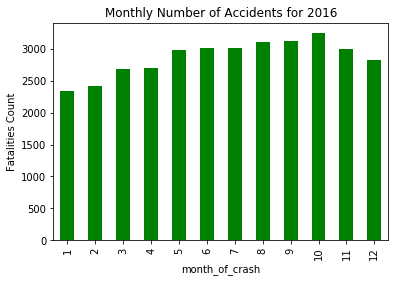

In [8]:
# Monthly data for fatalities in accidents
fatility_counts = pd.crosstab([Accident_df['month_of_crash']], Accident_df.number_of_fatalities)
fatility_counts.plot(kind='bar', stacked=True, color=['green'], legend=False, title='Monthly Number of Accidents for 2016').set_ylabel('Fatalities Count')

In [9]:
#top 4 month for people that lost their lives in an accident
Accident_df.groupby(['month_of_crash']).aggregate({'number_of_fatalities':sum}).sort_values('number_of_fatalities',ascending=False).head(4).reset_index()

,month_of_crash,number_of_fatalities
0,10,3526
1,8,3349
2,9,3344
3,6,3306


In [10]:
# Monthly data for accidents
acci_count=Accident_df.groupby(['month_of_crash']).count().reset_index()
acci_count.rename(columns={'Unnamed: 0': 'accident_count'}, inplace=True)
#type(acci_count)
acci_count = acci_count.filter(['month_of_crash', 'accident_count'], axis=1)
acci_count_sorted = acci_count.sort_values('accident_count',ascending=False)
acci_count_sorted.head(4)


,month_of_crash,accident_count
9,10,3249
8,9,3120
7,8,3106
6,7,3008


Text(0,0.5,u'Accident Counts')

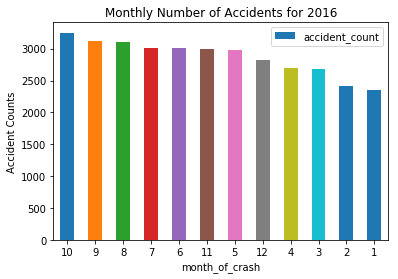

In [11]:
# Monthly data for accidents
acci_count_sorted.plot.bar(x='month_of_crash', y='accident_count', rot=0, title='Monthly Number of Accidents for 2016').set_ylabel('Accident Counts')

From the above graphs and data we analyzed that a higher number of fatal accidents occurred in October; followed by September, then August, then July.

This is interesting, but seems somewhat counterintuitive to what we would expect to see: a common presumption is that more dangerous weather, like snow and ice, lead to more dangerous driving conditions, which would presumably lead to more accidents. Yet here we see that it is the summer months, not the winter, that are more dangerous. Perhaps that's due to higher traffic volume, with more people going on "road-trips" aned traveling over the summer months.


In [12]:
#state wise analysis accidents. It displays the Top 10 States by their number of Accidents
acci_count_bystate=Accident_df.groupby(['state_name']).count().reset_index()
acci_count_bystate.rename(columns={'Unnamed: 0': 'accident_count_bystate'}, inplace=True)
acci_count_bystate_sorted = acci_count_bystate.sort_values('accident_count_bystate',ascending=False)
acci_count_bystate_sorted = acci_count_bystate_sorted.filter(['state_name', 'accident_count_bystate'], axis=1)
acci_count_bystate_sorted.head(10)

,state_name,accident_count_bystate
43,Texas,3407
4,California,3357
9,Florida,2933
10,Georgia,1422
33,North Carolina,1348
38,Pennsylvania,1088
35,Ohio,1053
13,Illinois,1003
22,Michigan,980
42,Tennessee,966


Text(0,0.5,u'Accident Count')

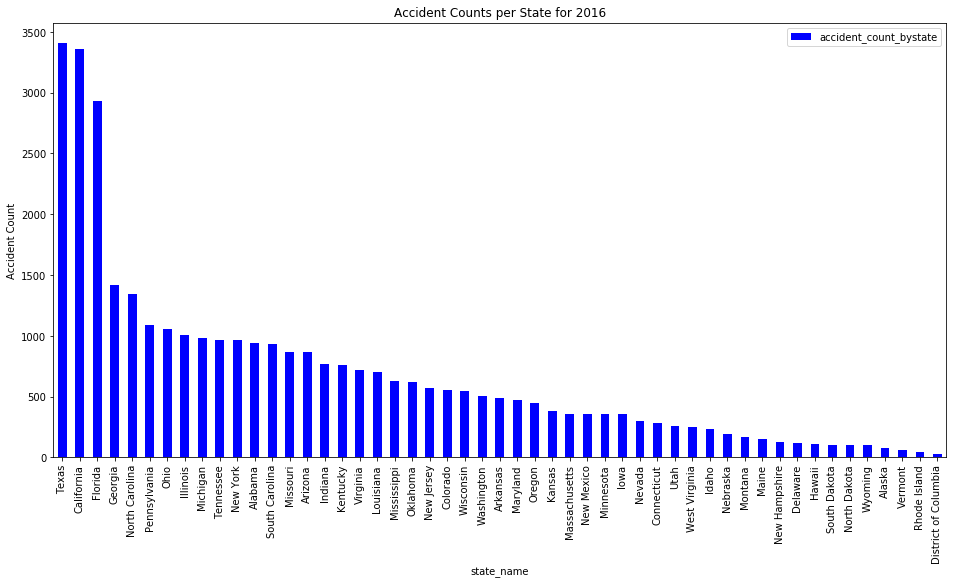

In [13]:
#state wise analysis for fatal accidents:
acci_count_bystate_sorted.plot.bar(x='state_name', y='accident_count_bystate', stacked=True, color=['blue'], title='Accident Counts per State for 2016', figsize=(16,8)).set_ylabel('Accident Count')

<font color=blue>From this information, we can see that Texas, followed by California and Florida, have the highest rates of accidents overall.

<p><p>Overall, however, this should not be surprising: these states have among the highest populations in the US. Therefore it is sensible that they would have the most *absolute* accidents, simply by virtue of having more people.

<p><p>Likewise, DC, Rhode Island, and Vermont have the least, but are also significantlly smaller in both size and population compared to other states.</font>

In [14]:
#Hour of accidents. Displays the top 10 hours when an accident occurs.
acci_count_bytime=Accident_df.groupby(['hour_of_crash']).count().reset_index()
acci_count_bytime
acci_count_bytime.rename(columns={'Unnamed: 0': 'accident_count_bytime'}, inplace=True)
acci_count_bytime_sorted = acci_count_bytime.sort_values('accident_count_bytime',ascending=False)
acci_count_bytime_sorted = acci_count_bytime_sorted.filter(['hour_of_crash','accident_count_bytime'], axis=1)
acci_count_bytime_sorted.head(10)

,hour_of_crash,accident_count_bytime
18,18,1984
20,20,1919
17,17,1913
19,19,1902
16,16,1808
21,21,1801
15,15,1731
22,22,1650
14,14,1567
13,13,1514


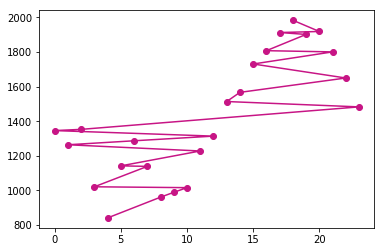

In [15]:
#Hours of accidents
acci_count_bytime_sorted = acci_count_bytime_sorted.loc[acci_count_bytime_sorted['hour_of_crash'] < 88]
plt.plot('hour_of_crash', 'accident_count_bytime', data=acci_count_bytime_sorted, marker='o', color='mediumvioletred')
plt.show()


A higher number of accidents occur between the hours 17 to 20, or 5 pm to 8 pm.

This seems sensible; it's around this time that most people with day-jobs are leaving and heading home, which leads to a higher volume of traffic on the roads. In addition, many after-school activities take place in this timeframe, as well, which may mean more inexperienced drivers. 

In [16]:
#Location of accident. Displays the top 10 Routes where accidents happen
acci_count_byloc=Accident_df.groupby(['route_signing_name']).count().reset_index()
acci_count_byloc
acci_count_byloc.rename(columns={'Unnamed: 0': 'accident_count_byloc'}, inplace=True)
acci_count_byloc_sorted = acci_count_byloc.sort_values('accident_count_byloc',ascending=False)
acci_count_byloc_sorted = acci_count_byloc_sorted.filter(['route_signing_name','accident_count_byloc'], axis=1)
acci_count_byloc_sorted.head(10)

,route_signing_name,accident_count_byloc
6,State Highway,10234
3,Local Street – Municipality,6104
7,U.S. Highway,5490
0,County Road,5160
1,Interstate,4295
4,Local Street – Township,1541
5,Other,1138
2,Local Street – Frontage Road (Since 1994),297
8,Unknown,180


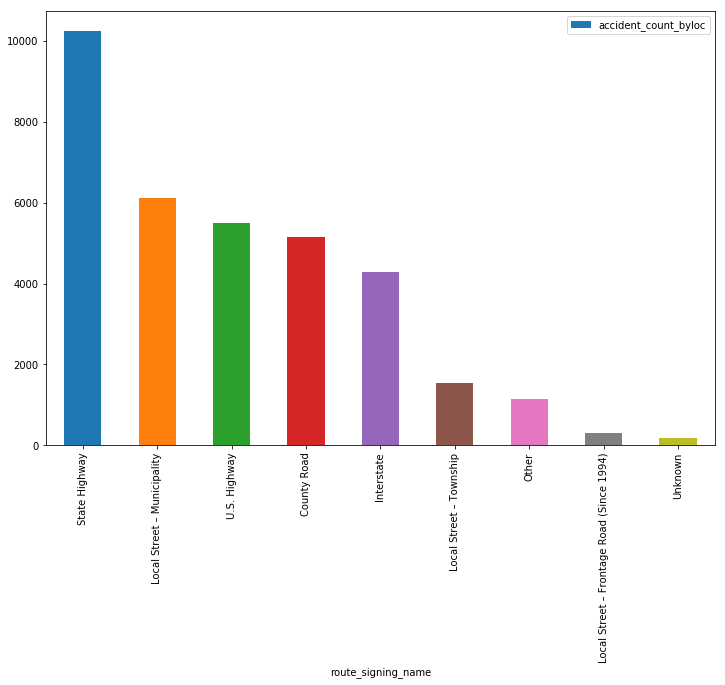

In [17]:
#Location of accident
acci_count_byloc_sorted.plot.bar(x='route_signing_name', y='accident_count_byloc', stacked=True, figsize=(12,8))

A higher number of accidents occur on State Highways<font color=blue>, by a significant margin, followed by local streets, then US highways.

<p><p>This sort of information is difficult to determine a cause for; at best, we could reason that state highways tend to be less well-lit, and more prone to sudden changes in direction. Travelers making trips cross-country that wind up taking them down state highways, and thus unfamiliar with the terrain, may be more prone to accidents in such areas. 

<p><p>It is unfortunate that the data set we are working with does not include more information regarding the driver or the vehicle: having access to the driver's state, or the state in which the vehicle was registered, would allow us to investigate such suspicions and give greater insight into the data we're examining. Were this project being performed in a professional context, we would absolutely look into ways of acquiring that information.</font>

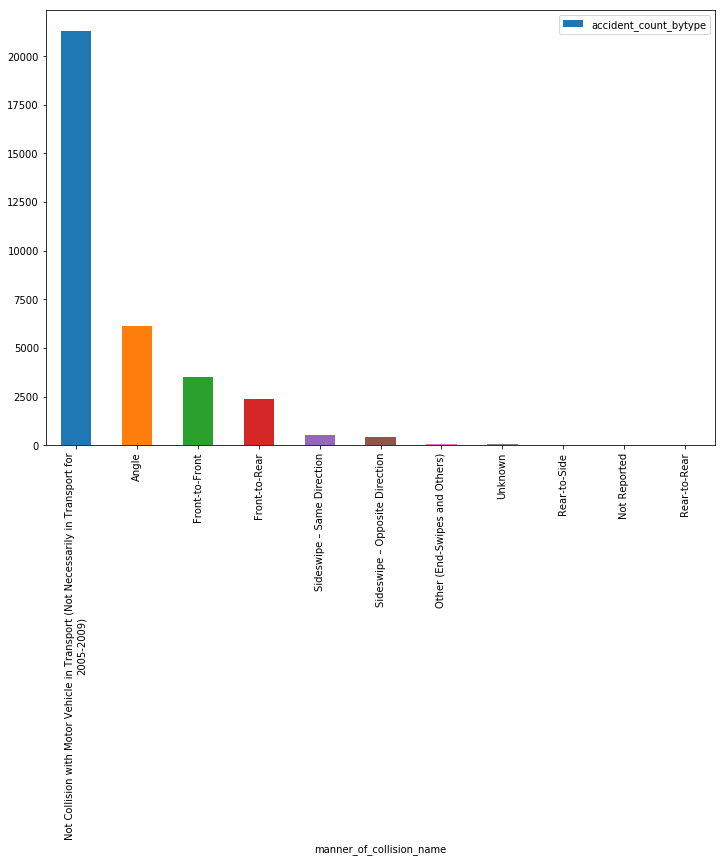

In [18]:
#Type of Collision which causes fatal accidents
acci_count_bytype=Accident_df.groupby(['manner_of_collision_name']).count().reset_index()
acci_count_bytype
acci_count_bytype.rename(columns={'Unnamed: 0': 'accident_count_bytype'}, inplace=True)
acci_count_bytype_sorted = acci_count_bytype.sort_values('accident_count_bytype',ascending=False)
acci_count_bytype_sorted = acci_count_bytype_sorted.filter(['manner_of_collision_name','accident_count_bytype'], axis=1)
#acci_count_bytype_sorted.head(10)

acci_count_bytype_sorted.plot.bar(x='manner_of_collision_name', y='accident_count_bytype', stacked=True, figsize=(12,8))

The data above, which details the manner of collision, indicates that the majority of accidents do not involve a collision with another vehicle. This category might include vehicles over which the driver lost control and wound up in a ditch, striking an object like a telephone pole or guard-rail, or some other situation.

<p><font color=blue>What this tells us is that accidents involving another vehicle are comparatively exceedingly rare.</font>

In [19]:
#level of light that existed at the time of the crash as indicated in the case material.
acci_count_bylight=Accident_df.groupby(['light_condition_name']).count().reset_index()
acci_count_bylight
acci_count_bylight.rename(columns={'Unnamed: 0': 'accident_count_bylight'}, inplace=True)
acci_count_bylight_sorted = acci_count_bylight.sort_values('accident_count_bylight',ascending=False)
acci_count_bylight_sorted = acci_count_bylight_sorted.filter(['light_condition_name','accident_count_bylight'], axis=1)
acci_count_bylight_sorted.head(10)

,light_condition_name,accident_count_bylight
4,Daylight,16336
1,Dark – Not Lighted,9494
0,Dark – Lighted,6732
5,Dusk,803
3,Dawn,595
2,Dark – Unknown Lighting,262
8,Unknown,188
6,Not Reported,15
7,Other,14


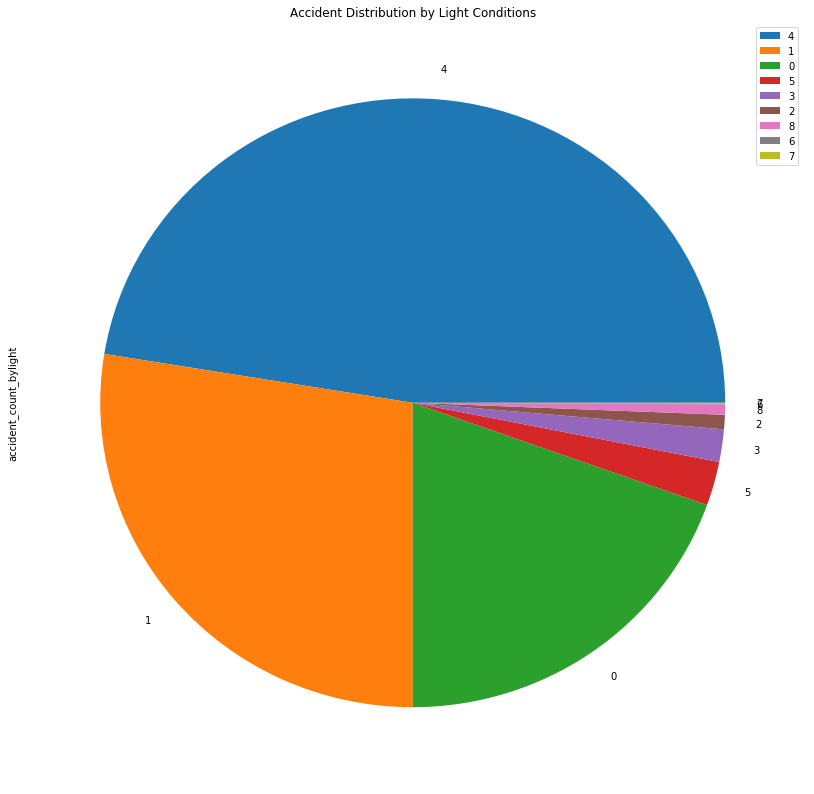

In [20]:
#level of light that existed at the time of the crash as indicated in the case material.
acci_count_bylight=Accident_df.groupby(['light_condition_name']).count().reset_index()
acci_count_bylight
acci_count_bylight.rename(columns={'Unnamed: 0': 'accident_count_bylight'}, inplace=True)
acci_count_bylight_sorted = acci_count_bylight.sort_values('accident_count_bylight',ascending=False)
acci_count_bylight_sorted.head(10)
acci_count_bylight_sorted.plot.pie(y='accident_count_bylight', figsize=(14, 14), title='Accident Distribution by Light Conditions')

More accidents happen during the day than during any other time. <font color=blue>This is most likely a function of when most people are awake and driving: it seems sensible to presume that most people work jobs during the day, and so there is a greater amount of traffic during that time.

<p><p>That said, however, we have already determined that most accidents occur between 5 pm and 8 pm, which is coloquially referred to as "at night." We can correlate this information with the fact that most accidents occur during the summer months: especially in Southern states, the sun doesn't set until quite late in the day during the summer.

<p><p>Once more, the lack of data regarding the individuals involved in the accidents in question is limiting us. From this information - most accidents occur during daylight, between 5 pm and 8 pm, and in the summer months - that would possibly lead us to believe that there is a high rate of teenagers involved: due to their inexperience in driving, this information possibly suggests that teenagers represent a significant number of fatalities. Again, were this project in a more professional context, we would certainly look for more data on this topic to test that hypothesis.</font>

In [21]:
#Weather conditions during accidents
acci_count_byatm=Accident_df.groupby(['atmospheric_conditions_name']).count().reset_index()
acci_count_byatm
acci_count_byatm.rename(columns={'Unnamed: 0': 'accident_count_byatm'}, inplace=True)
acci_count_byatm_sorted = acci_count_byatm.sort_values('accident_count_byatm',ascending=False)
acci_count_byatm_sorted = acci_count_byatm_sorted.filter(['atmospheric_conditions_name','accident_count_byatm'], axis=1)
acci_count_byatm_sorted.head(10)

,atmospheric_conditions_name,accident_count_byatm
2,Clear,24620
3,Cloudy,4961
8,Rain,2148
6,Not Reported,1634
11,Snow,350
4,"Fog, Smog, Smoke",329
12,Unknown,183
10,"Sleet, Hail",66
7,Other,54
9,Severe Crosswinds,48


Text(0,0.5,u'Number of Accidents')

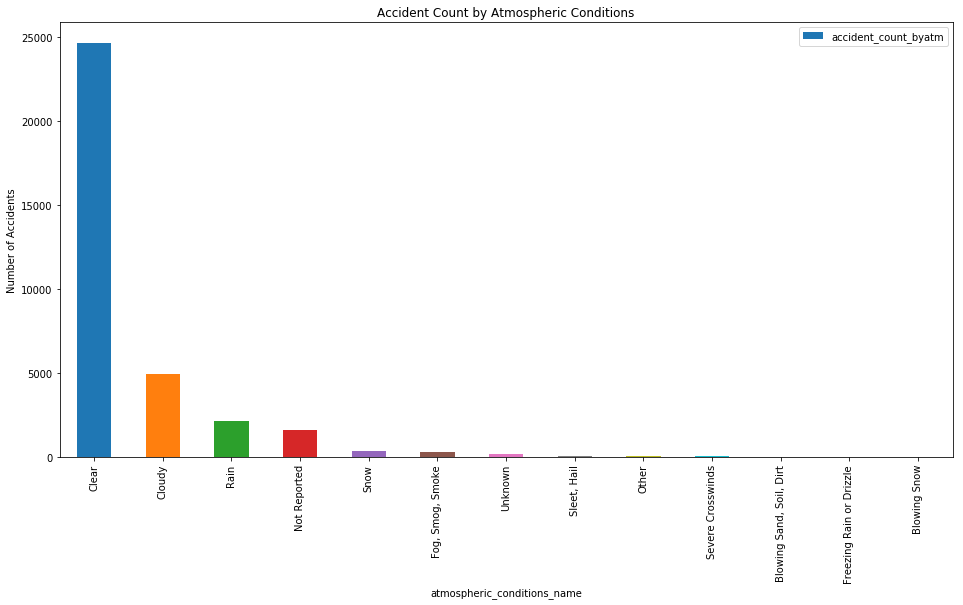

In [22]:
#Weather conditions during accidents
acci_count_byatm_sorted.plot.bar(x='atmospheric_conditions_name', y='accident_count_byatm', stacked=True, figsize=(16,8), title='Accident Count by Atmospheric Conditions').set_ylabel('Number of Accidents')

Fatal accidents are more likely to happen on clear or cloudy days, with rain being the third most common form of precipitation during an accident.

This again seems counterintuitive to what we would presume. However, in this case, it is possible that the nature of weather systems are playing a role: for instance, if a given location only has rain 10% of the time, we would expect that 10% of the accidents would occur during rainy periods. If that were not the case (if, say, 30% of accidents occurred during rainy periods), then that would suggest a much stronger relationship between precipitation and accidents than this data suggests.

From the above statistics on data we analyzed that more accidents happen during the months July, August 
and October, and specifically occur more in the evening hours, between 5 pm and 8 pm. Fatal accidents are more likely to happen on state highways, and the highest number of accidents occurred in Texas, followed by California and Florida.

<p><font color=blue>As has been observed, the lack of more detailed information on the individuals themselves is limiting our ability to make a more nuanced investigation. This goes to show that the constant desire for more data in the professional world of data science is very real.</font>

In [23]:
#simple descriptive statistics for atmospheric conditions 
Accident_df[['number_of_fatalities','atmospheric_conditions_1_name']].groupby('atmospheric_conditions_1_name').describe()

number_of_fatalities                           \
                                             count      mean       std  min   
atmospheric_conditions_1_name                                                 
Blowing Sand, Soil, Dirt                      20.0  1.150000  0.489360  1.0   
Blowing Snow                                  10.0  1.000000  0.000000  1.0   
Clear                                      24620.0  1.086596  0.345653  1.0   
Cloudy                                      5062.0  1.094034  0.371702  1.0   
Fog, Smog, Smoke                             325.0  1.092308  0.338983  1.0   
Freezing Rain or Drizzle                      16.0  1.062500  0.250000  1.0   
Not Reported                                1634.0  1.065483  0.331998  1.0   
Other                                         51.0  1.137255  0.400979  1.0   
Rain                                        2082.0  1.103746  0.417994  1.0   
Severe Crosswinds                             42.0  1.071429  0.260661  1.0   
Sleet, Hail                                   65.0  1.076923  0.268543  1.0   
Snow                                         329.0  1.082067  0.306356  1.0   
Unknown                                      183.0  1.081967  0.294366  1.0   

                                                   
                               25%  50%  75%  max  
atmospheric_conditions_1_name                      
Blowing Sand, Soil, Dirt       1.0  1.0  1.0  3.0  
Blowing Snow                   1.0  1.0  1.0  1.0  
Clear                          1.0  1.0  1.0  6.0  
Cloudy                         1.0  1.0  1.0  6.0  
Fog, Smog, Smoke               1.0  1.0  1.0  3.0  
Freezing Rain or Drizzle       1.0  1.0  1.0  2.0  
Not Reported                   1.0  1.0  1.0  6.0  
Other                          1.0  1.0  1.0  3.0  
Rain                           1.0  1.0  1.0  9.0  
Severe Crosswinds              1.0  1.0  1.0  2.0  
Sleet, Hail                    1.0  1.0  1.0  2.0  
Snow                           1.0  1.0  1.0  3.0  
Unknown                        1.0  1.0  1.0  3.0

In [24]:
#simple descriptive statistics for light condition
Accident_df[['number_of_fatalities','light_condition_name']].groupby('light_condition_name').describe()

number_of_fatalities                                \
                                       count      mean       std  min  25%   
light_condition_name                                                         
Dark – Lighted                        6732.0  1.071598  0.311110  1.0  1.0   
Dark – Not Lighted                    9494.0  1.099115  0.380961  1.0  1.0   
Dark – Unknown Lighting                262.0  1.049618  0.234520  1.0  1.0   
Dawn                                   595.0  1.089076  0.343969  1.0  1.0   
Daylight                             16336.0  1.088761  0.356263  1.0  1.0   
Dusk                                   803.0  1.089664  0.330390  1.0  1.0   
Not Reported                            15.0  1.000000  0.000000  1.0  1.0   
Other                                   14.0  1.000000  0.000000  1.0  1.0   
Unknown                                188.0  1.058511  0.257054  1.0  1.0   

                                        
                         50%  75%  max  
light_condition_name                    
Dark – Lighted           1.0  1.0  5.0  
Dark – Not Lighted       1.0  1.0  6.0  
Dark – Unknown Lighting  1.0  1.0  3.0  
Dawn                     1.0  1.0  5.0  
Daylight                 1.0  1.0  9.0  
Dusk                     1.0  1.0  5.0  
Not Reported             1.0  1.0  1.0  
Other                    1.0  1.0  1.0  
Unknown                  1.0  1.0  3.0

## Visualize Attributes

The correlation heatmap is great for finding relationships with many attributes.

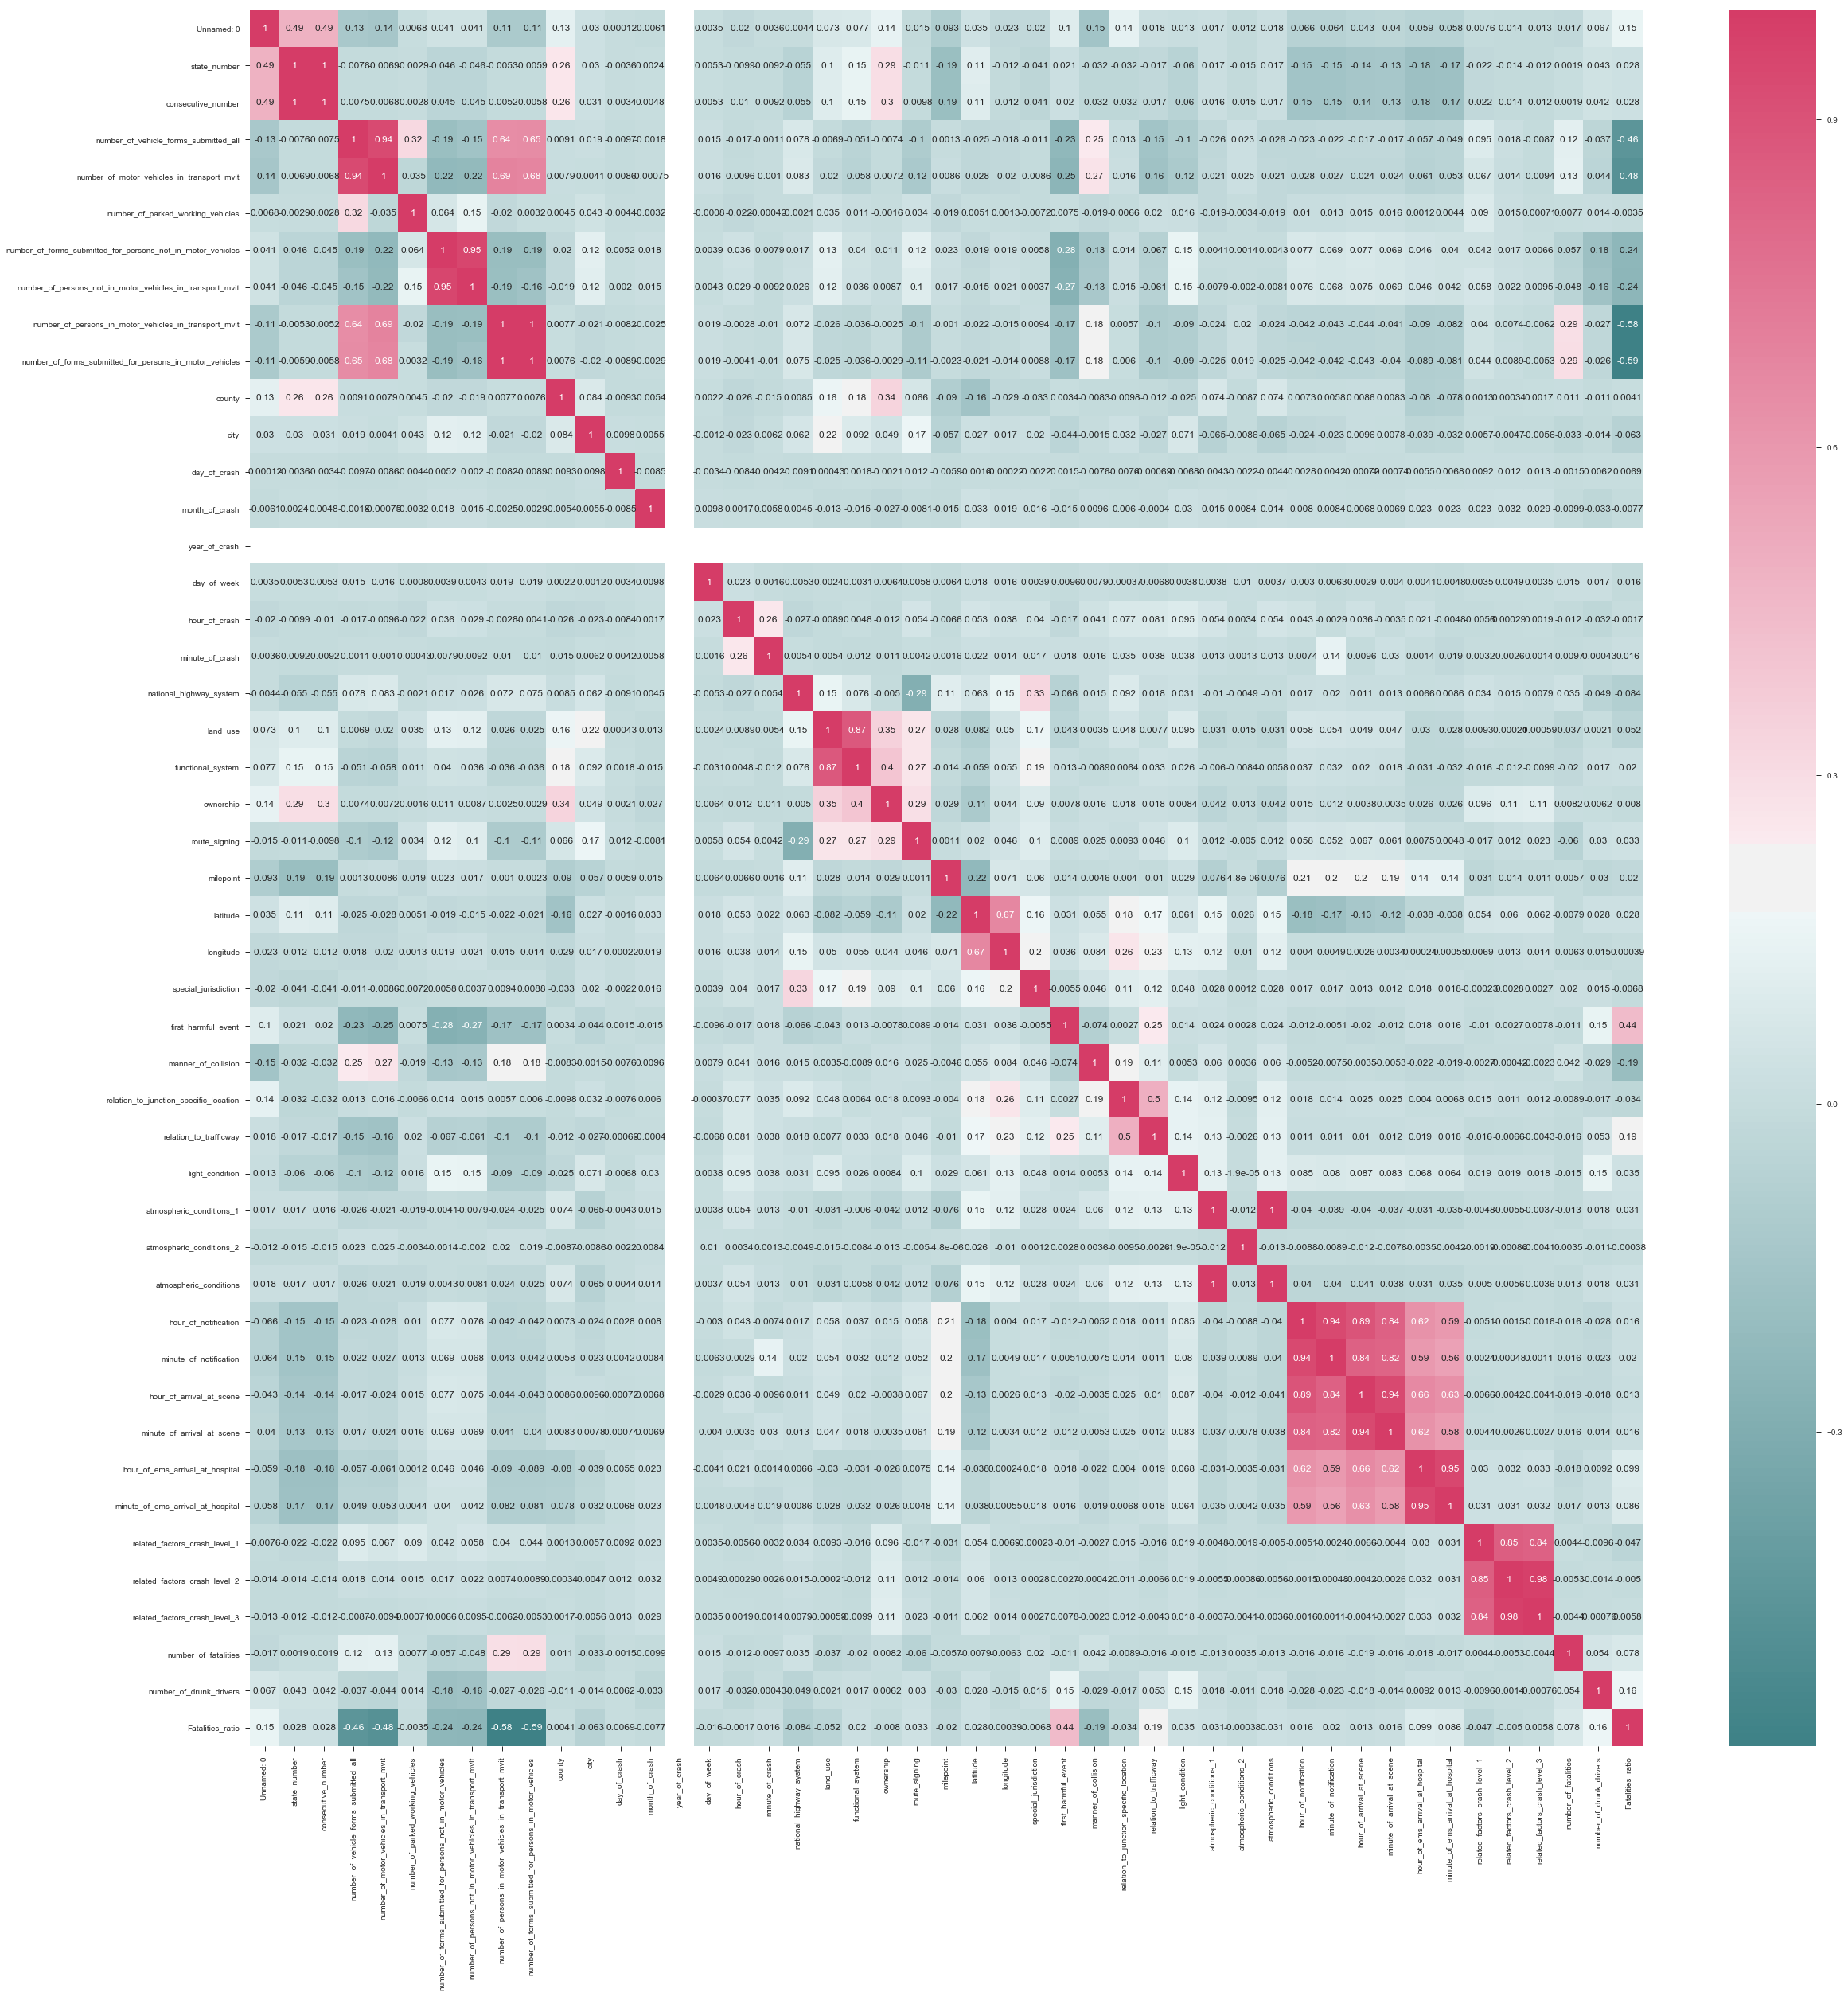

In [25]:
# plot the correlation matrix using seaborn
cmap = seaborn.diverging_palette(200, 1, as_cmap=True) # Assign color for table 
seaborn.set(style="ticks") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(35, 35))

seaborn.heatmap(Accident_df.corr(), cmap=cmap, annot=True)

f.tight_layout()

<font color=blue>There are points of high levels of correlation between a set of variables, all of them relating to time: *hour_of_arrival_at_scene* and *hour_of_ems_arrival_at_hospital*, for instance. This is most likely due to a few factors, namely: first, these are times, and as such the possible values are constrained (0 to 59 for minutes and seconds, 0 to 23 for hours), which will result in them appearing to be correlated; second, there are also a number of values missing or otherwise unknown for these timestamps, which are encoded as 88 and 99, which will lead to them showing a degree of correlation (since if a timestamp is missing, each of the values will be encoded as 88 or 99).

<p><p>There is a small zone of correlation involving *land_use*, *functional_system*, *ownership*, and *route_signing*. That these are encoded values - that is, the creators of the data set used a coding system that translates human ideas into a numbering system - suggests to us that the most common values were given the lowest numerical encoding, resulting in this apparent correlation. In other words, while these variables seem correlated, there is most likely no good reason to think that they actually are related.</font>

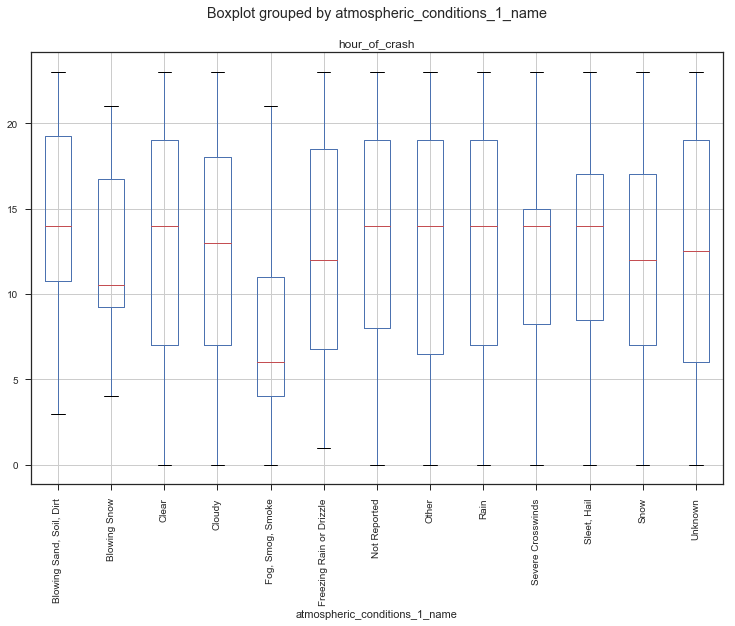

In [26]:
#Initiate boxplot 
#ax = Accident_df.boxplot(column='consecutive_number', by = 'atmospheric_conditions_1_name')

Accident_df_fixed_times = Accident_df[Accident_df.hour_of_crash < 88]

Accident_df_fixed_times.boxplot(column='hour_of_crash', by = 'atmospheric_conditions_1_name', rot=90, figsize=(12,8))

<font color=blue>Here, we are specifically ignoring any record that has an *hour_of_crash* value of 88 or greater: these values indicate that the value is unknown.

<p><p>This boxplot shows the relationship between hour of the day, in 24-hour format, and the weather at the time. It should be remembered that this is in context of fatal accidents: what this tells us is that, for a majority of meteorological conditions, most accidents occur before 8 pm (20, in 24-hour format) and after 5 am, with most medians being around the 2 pm (14) point.

<p><p>This is interesting, as this tells a slightly different story from our earlier look at when accidents are most common, between 5 pm and 8 pm. The section we should pay most attention to here is *clear*, as - from earlier - we determined that the overwhelming majority of accidents happen during clear skies. That column more closely fits that determination (with the third quartile between the hours of 2 pm and 7 pm).</font>

In [28]:
#Creates a new column to identify if there was daylight at the time of the accident. Dawn and Dusk were indicated as daylight.
#This effective turns the daylight condition column into a binary field to be used later in the violin graph
Accident_df['Day_Time_Yes_No'] = np.where(Accident_df['light_condition'] == 1 , 'yes', 'no')
Accident_df['Day_Time_Yes_No'] = np.where(Accident_df['light_condition'] == 4 , 'yes', Accident_df['Day_Time_Yes_No'])
Accident_df['Day_Time_Yes_No'] = np.where(Accident_df['light_condition'] == 5 , 'yes', Accident_df['Day_Time_Yes_No'])
#Treats unknown and not reported as null in the data set. This is done because we cannot gain any insight of the lighting condition from these records. 
Accident_df['Day_Time_Yes_No'] = np.where(Accident_df['light_condition'] == 8 , np.nan , Accident_df['Day_Time_Yes_No'])
Accident_df['Day_Time_Yes_No'] = np.where(Accident_df['light_condition'] == 9 , np.nan , Accident_df['Day_Time_Yes_No'])

#count and summary of new light condition field 
Accident_df.groupby(['light_condition','light_condition_name','Day_Time_Yes_No']).size()

light_condition  light_condition_name     Day_Time_Yes_No
1                Daylight                 yes                16336
2                Dark – Not Lighted       no                  9494
3                Dark – Lighted           no                  6732
4                Dawn                     yes                  595
5                Dusk                     yes                  803
6                Dark – Unknown Lighting  no                   262
7                Other                    no                    14
dtype: int64

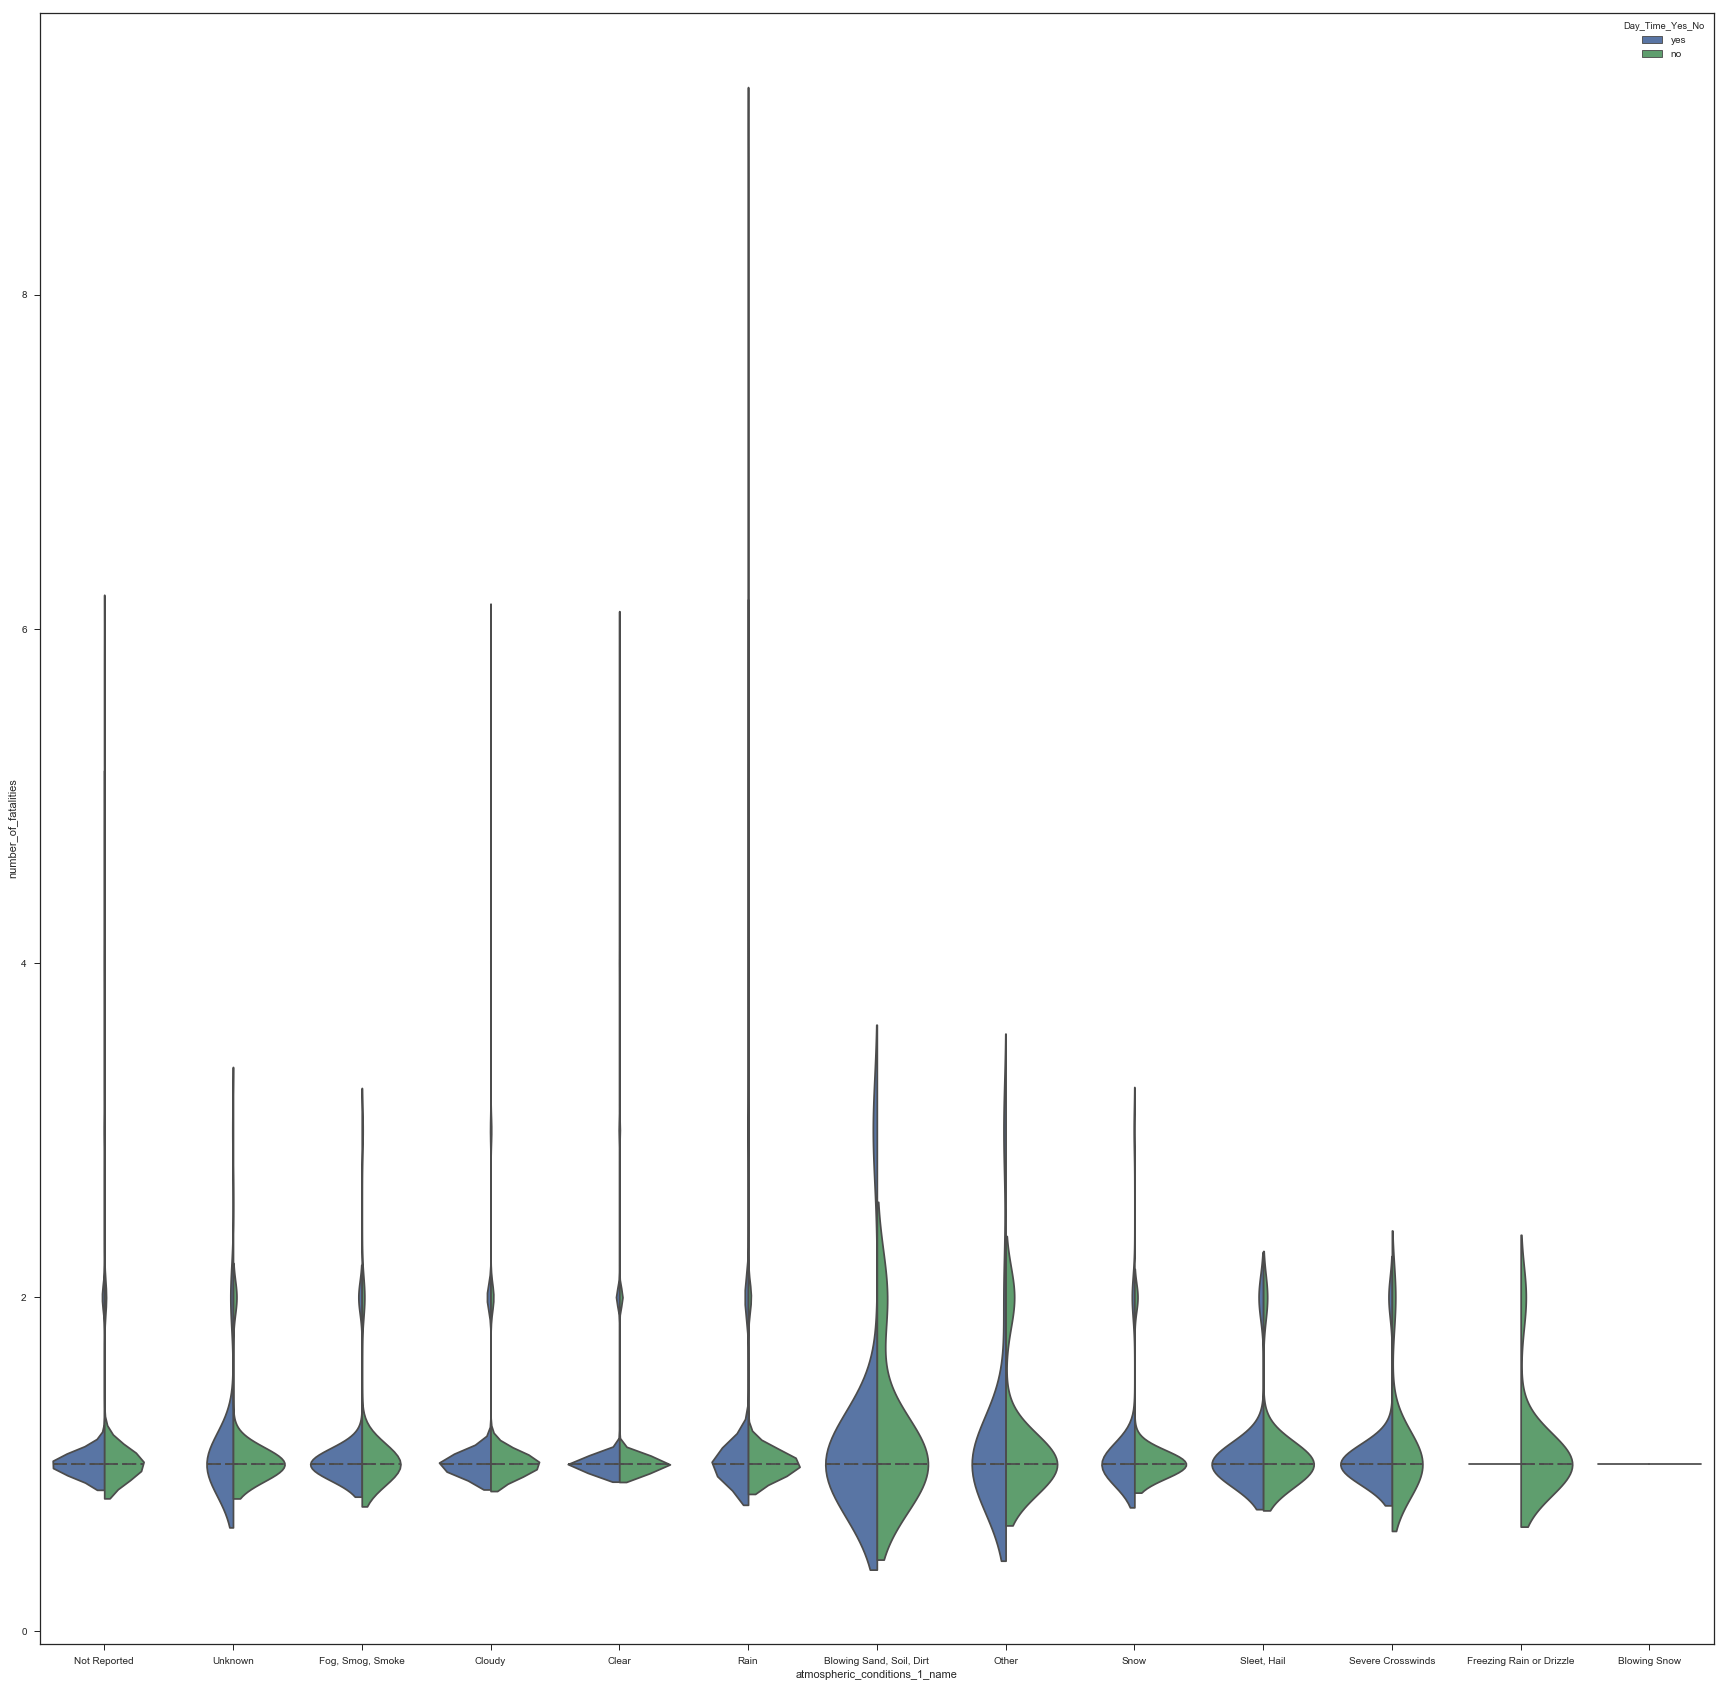

In [29]:

#adjust the size of the violin plot
f, ax = plt.subplots(figsize=(30, 30))

#seaborn.violinplot(x="atmospheric_conditions_1_name", y="consecutive_number", hue="Day_Time_Yes_No", data=Accident_df, split=True, inner="quart")

seaborn.violinplot(x="atmospheric_conditions_1_name", y="number_of_fatalities", hue="Day_Time_Yes_No", data=Accident_df, split=True, inner="quart")

<font color=blue>Here, we can see a rather clear relationship between time day of (daytime *v.* night), weather conditions, and number of fatalities.

<p><p>From this, we can draw a number of conclusions. Both rain and blown sand or dirt seem to be quite dangerous, but in different ways: rain is responsible for all accidents involving 7 or more fatalities, while blown sand or dirt accounts for a very noticeable number of single-fatality crashes, and notable at dual-fatality crashes at night.

<p><p>A number of weather conditions have differing levels of fatality based on time of day: freezing rain at night is noticeably more dangerous at night than during the day, for instance, while fog or smog is more dangerous during the day.</font>

## Explore Joint Attributes

Relationship between the number of accidents and the weather conditions. The Attributes are:  

    * Fatalities_ratio
    * number_of_fatalities 
    * total_number_of_persons_involved
    * accident_count
    
Each row or observation is one car accident. It provides the conditions in which the accident occurred. It captures the number of fatalities, number of people involved in the accident, the time it took first reponders to get to the area, and then to the hospital. These statistics are provided by state, and highway where it happend.

One of the relations that can be made is highway *v.* number of accidents: does a particular highway present a higher risk than others?

To explore the selected attributes there is no need to have the entire data set - specifically, our data set has a high number of duplicate factors, and some information is does not add value to our investigations. Below, there is a list of attributes that would be remove to make things more understandable. This code is an adaptation from the 'DataMiningNotebooks'

In [15]:
#Accident_df.info()
# This creates a copy of the main data. In this way we keep the original data in case we need it for further analysis
Accident_forScatter=Accident_df.copy()

    # 'state_name',

# 1. Remove attributes that just arent useful for us
for col in ['Unnamed: 0',
             'state_number',
             'consecutive_number',
             'county',
             'city',
             'day_of_crash',
             'month_of_crash',
             'year_of_crash',
             'day_of_week',
             'hour_of_crash',
             'minute_of_crash',
             'national_highway_system',
             'land_use',
             'land_use_name',
             'functional_system',
             'functional_system_name',
             'ownership',
             'ownership_name',
             'route_signing',
             'route_signing_name',
             'trafficway_identifier',
             'trafficway_identifier_2',
             'latitude',
             'longitude',
             'special_jurisdiction',
             'special_jurisdiction_name',
             'first_harmful_event',
             'first_harmful_event_name',
             'manner_of_collision',
             'manner_of_collision_name',
             'relation_to_junction_within_interchange_area',
             'relation_to_junction_specific_location',
             'relation_to_junction_specific_location_name',
             'type_of_intersection',
             'work_zone',
             'relation_to_trafficway',
             'relation_to_trafficway_name',
             'light_condition',
             'light_condition_name',
             'atmospheric_conditions_1',
             'atmospheric_conditions_1_name',
             'atmospheric_conditions_2',
             'atmospheric_conditions_2_name',
             'atmospheric_conditions',
             'school_bus_related',
             'rail_grade_crossing_identifier',
             'hour_of_notification',
             'minute_of_notification',
             'hour_of_arrival_at_scene',
             'minute_of_arrival_at_scene',
             'hour_of_ems_arrival_at_hospital',
             'minute_of_ems_arrival_at_hospital',
             'related_factors_crash_level_1',
             'related_factors_crash_level_1_name',
             'related_factors_crash_level_2',
             'related_factors_crash_level_2_name',
             'related_factors_crash_level_3',
             'related_factors_crash_level_3_name',
             'milepoint',
             'timestamp_of_crash',
             'number_of_vehicle_forms_submitted_all',
             'number_of_forms_submitted_for_persons_not_in_motor_vehicles',
             'number_of_forms_submitted_for_persons_in_motor_vehicles']:
                    if col in Accident_forScatter:
                        del Accident_forScatter[col]
                
# Dislplays the data types of the variables
Accident_forScatter.dtypes


state_name                                                   object
number_of_motor_vehicles_in_transport_mvit                    int64
number_of_parked_working_vehicles                             int64
number_of_persons_not_in_motor_vehicles_in_transport_mvit     int64
number_of_persons_in_motor_vehicles_in_transport_mvit         int64
atmospheric_conditions_name                                  object
number_of_fatalities                                          int64
number_of_drunk_drivers                                       int64
dtype: object

In [16]:
#New Feature that aggregates the all the people involved in accident event.
Accident_forScatter['total_number_of_persons_involved']=Accident_forScatter.number_of_persons_not_in_motor_vehicles_in_transport_mvit + Accident_forScatter.number_of_persons_in_motor_vehicles_in_transport_mvit

Some of the Atmospheric conditions do not have a meaning in this data and do not add value to the analysis. Therefore they will be removed.  
Observations in the 'atmospheric_conditions_name' with the following values, are removed from the data set:  
* Not Reported
* Unknown
* Other

The number is reduced to 32568 records.

In [17]:
#Remove Atmospheric conditions that don't have a meaning
# Atmospheric Observations removed:'Not Reported', 'Unknown','Other'.  
filteredAcc = Accident_forScatter[Accident_forScatter['atmospheric_conditions_name'].str.contains(
    'Fog, Smog, Smoke|Cloudy|Clear|Rain|Severe Crosswinds|Snow|Sleet, Hail|Blowing Sand, Soil, Dirt|Freezing Rain or Drizzle|Blowing Snow')]
#filteredAcc.atmospheric_conditions_name.unique() 
#filteredAcc.shape

''

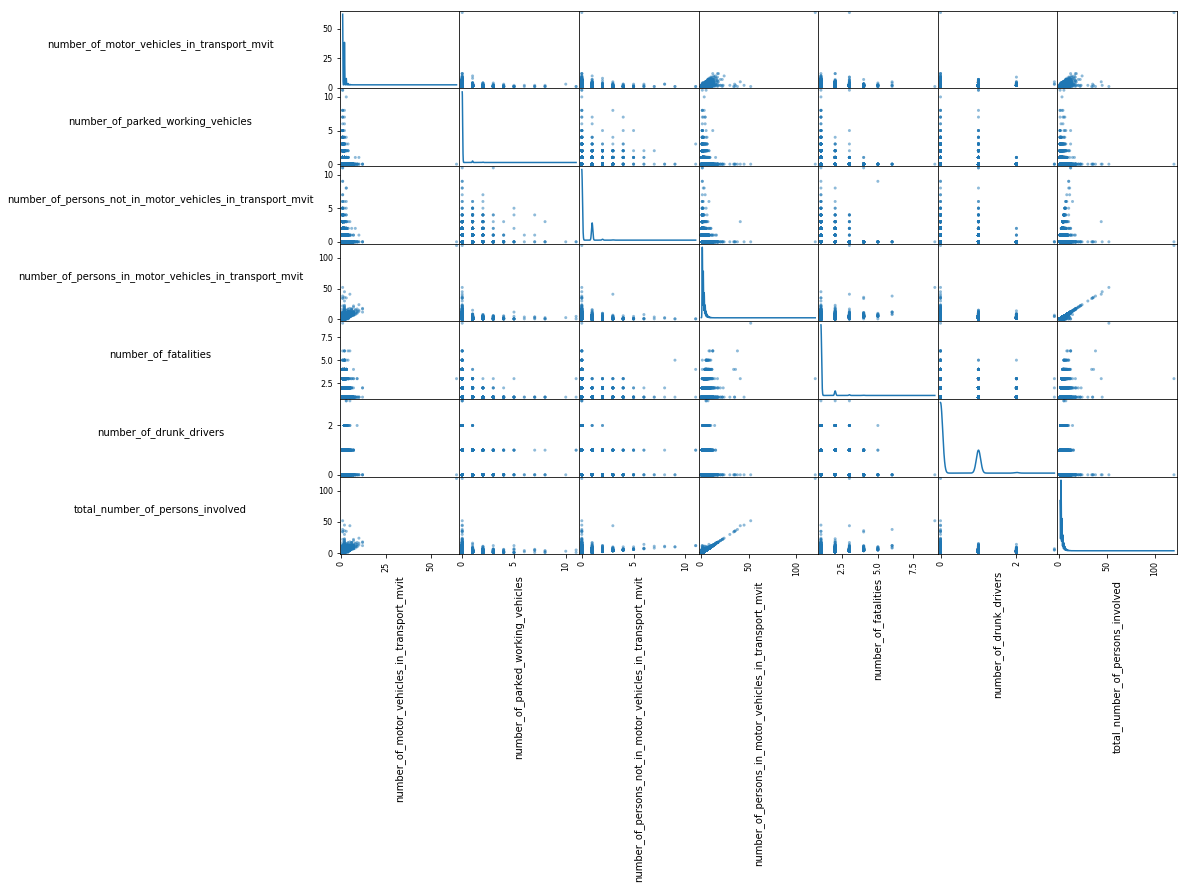

In [18]:
#from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix

ax = scatter_matrix(filteredAcc,figsize=(15, 10),diagonal='kde')
#y labels
[plt.setp(item.yaxis.get_label(), 'size', 10,  rotation=0) for item in ax.ravel()]

#x labels
[plt.setp(item.xaxis.get_label(), 'size', 10, rotation=90) for item in ax.ravel()]

#need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1.5,0.5) for s in ax.reshape(-1)]
;

The use of this scatter matrix is to help visualize the correlation between some of the continuous variables. There are many cases where there is no correlation between the variables: for example, the number of parked vehicles and the number of persons not inside a vehicle. Another example is the number of people inside and outside the vehicles when the accident happened. 

On the other hand, some of the positive correlation are the number of persons in a vehicle and the number of people involved in an accident, suggesting that the number of people in an accident is dependant, in many cases, on the people inside the vehicle. 
There may be a need to do further investigation or data transformation to understand if there are more indepth correlations, like the number of persons involved and the relation with the woking vehicles parked on the road.

<font color=blue><p><p>There appears to be a weak negative correlation between the number of parked, working vehicles, and the number of fatalities: it would seem that accidents that involve parked vehicles have a tendency to be less fatal.

<p><p>Similarly, there appears to be a weak negative correlation between the number of fatalities, and the number of people not in vehicles. This seems fairly sensible: if there is an accident involving someone operating a vehicle, and someone who is not in a vehicle, our intution tells us that there is a much greater danger to the person outside the vehicle.

<p><p>There does not seem to be much correlation between number of fatalities, and the number of people inside vehicles involved in the crash: while there is a small amount of correlation (obviously, if there is only 1 person in a crash, there can - at most - be 1 fatality), but beyond that sensible relationship there doesn't appear to be too much interaction. This would imply then that just the presence of more people does not make a crash more likely to be fatal - this might be somewhat counterintuitive (for instance, we might think that a car with one teenager is less at risk than a car with four, simply due to the typical behavior of teenagers in groups).

<p><p>There is also what appears to be a strongly negative correlation between number of parked vehicles, and number of drunk drivers. This suggests that accidents involving multiple drunk drivers are more likely to involve vehicles in motion. What we can derive from this is that drunks are potentially more dangerous when they are in proximity to *each other*: drunk drivers may be more likely to get involved in accidents with other drivers who are similarly impaired.</font>

In [37]:
#Accident_forScatter.transpose()
# Aggregating the data for the correlation between the atmospheric conditions and the number of fatalities

#plt.hist(Accident_forScatter.number_of_fatalities, bins=30, histtype='stepfilled')

GroupAccidentByStateAtmos= filteredAcc.groupby(['state_name','atmospheric_conditions_name'] )


GroupAccidentResult=GroupAccidentByStateAtmos.aggregate({'number_of_fatalities':'sum',
                                                         'number_of_drunk_drivers':'count',
                                                          'Fatalities_ratio':'mean',
                                                          'total_number_of_persons_involved':'sum'})

GroupAccidentResult.rename(columns={'number_of_drunk_drivers': 'accident_count'}, inplace=True)
#GroupAccidentResult.reset_index()
#GroupAccidentResult

The data was grouped by state and atmospheric conditions. With this we are trying to understand what the Fatality / Accident ratio is. What was found is that the distribution could be considered as bimodal, since it has to distict peaks. One at 60% indicating that in average for every 10 accidents 6 of them are fatal. At the same time, there is another peak at 100%, indicating that all the accidents end up in fatality. 

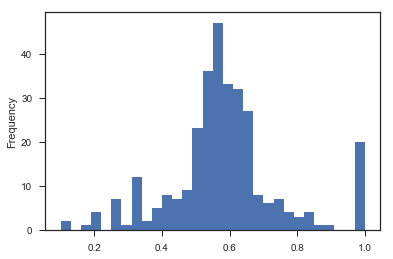

In [38]:
#grouped histogram per State and Atmospheric conditions
GroupAccidentResult.Fatalities_ratio.plot.hist(bins=30, histtype='stepfilled')

One of the relation between attributes on the state level was to understand if an accident resulted in at least one fatality.

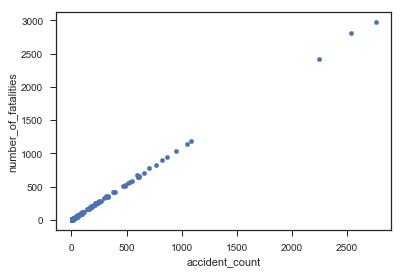

In [39]:
# Scatter plot to see the ralation between the accident events and the number of fatalities per event.
GroupAccidentResult.plot.scatter(x='accident_count',y='number_of_fatalities')

A simple linear regression can tell us that for every accident that happened in a state, there will be 1.08 fatalities. This is because there are instances of accidents with more than one death per accident.

('Model Slope: ', 1.0868902876958688)
('Model Intercept: ', 0.20373261393852715)


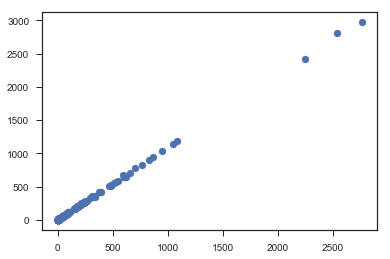

In [40]:
from sklearn.linear_model import LinearRegression
# Linear model to better understand the relation between the accident event and their fatalities.
model = LinearRegression(fit_intercept=True)
x=GroupAccidentResult.accident_count
y=GroupAccidentResult.number_of_fatalities
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);
print("Model Slope: ", model.coef_[0])
print("Model Intercept: ", model.intercept_)

## Explore Attributes and Class

The class of interest is the atmospheric conditions and their effect on the number of fatalities, the fatality ratio, and the number of people involved in the accident. It was found that there is not much effect on the fatalities ratio when it comes to the atmospheric condition. However, it can be seen that the number of fatalities can see a separation due to this weather condition. The same can be said for the total number of persons involved in an accident.

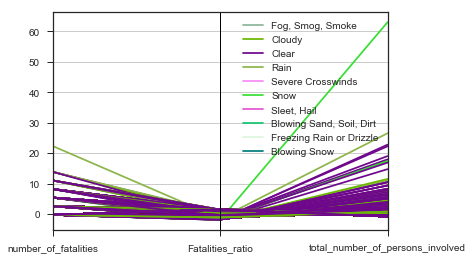

In [41]:
#from pandas.tools.plotting import parallel_coordinates
from pandas.plotting import parallel_coordinates
acc_sub = filteredAcc[['number_of_fatalities','Fatalities_ratio','total_number_of_persons_involved']]
# normalizing the above variables, to make the parallel plot
acc_sub_normalized = (acc_sub-acc_sub.mean())/(acc_sub.std())
acc_sub_normalized['atmospheric_conditions_name']=filteredAcc.atmospheric_conditions_name
#Parallel coordinates plot
parallel_coordinates(acc_sub_normalized, 'atmospheric_conditions_name')


<font color=blue>This plot demonstrates the normalized values for number of fatalities against the total number of people involved in a given crash.

<p><p>Here, we can see rather clearly that accidents in the rain are notably more likely to result in a fatal crash, while accidents involve a much larger number of people in snowy conditions.</font>

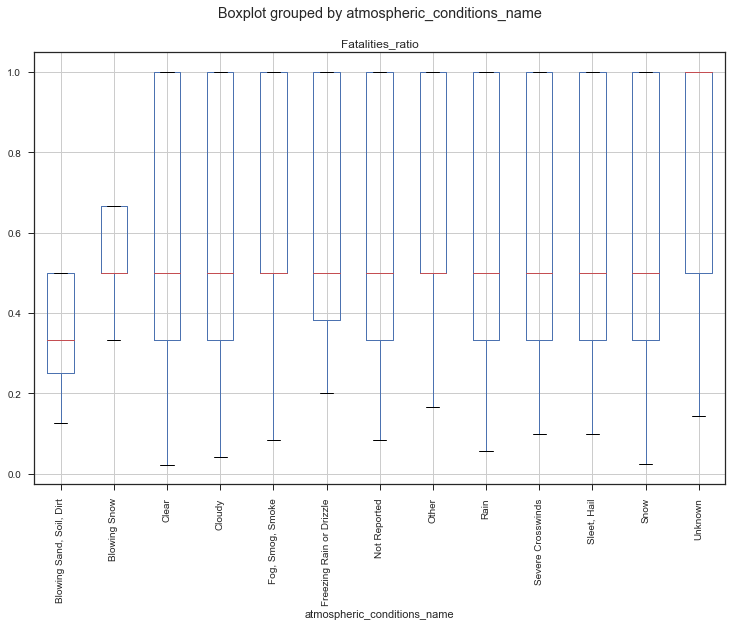

In [42]:
# Boxplot to compare the atmospheric conditions and the Fatality Rate.
Accident_df.boxplot(column='Fatalities_ratio', by = 'atmospheric_conditions_name', rot=90, figsize=(12,8))

<font color=blue>This plot demonstrates the relationship between atmospheric conditions and fatality rate of accidents within those conditions.

<p><p>What we immediately noticed here was that, for most weather types, the median fatality rate was .5, which indicates that there may not be a strong relationship between atmospheric conditions and fatality rates.

<p><p>Of note, however, is that the "Unknown" category has a significantly higher fatality ratio (1, or quite near); a possible explanation of this would be accidents that were so severe that the officers involved in dealing with the crash were too busy dealing with the actual event to bother with paperwork, which would include things like recording the condition at the time of the crash. Alternatively, it may mean that officers arrived at the scene significantly delayed and were unable to properly determine the weather at the time of the crash.

<p><p>Regardless, this would seem to indicate that there isn't a strong relationship between weather conditions and fatality rates.</font>

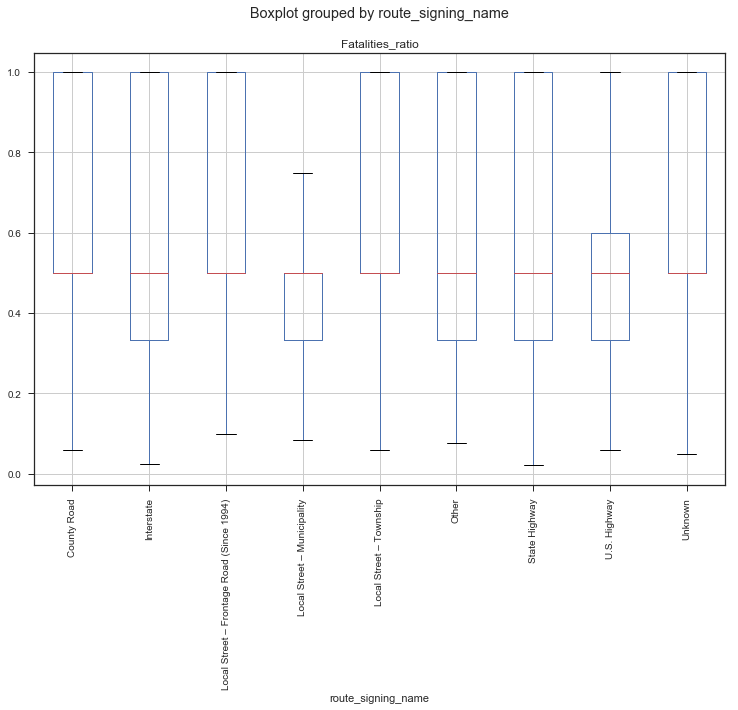

In [43]:
#Box Plot to compare the road type and the Fatality Rate
Accident_df.boxplot(column='Fatalities_ratio', by = 'route_signing_name', rot=90, figsize=(12,8))

<font color=blue>This plot demonstrates the relationship between the type of road the accident occurred on, and the fatality rate for accidents on those road types.

<p><p>From this, it would appear that local streets and US highways are generally safer: for local streets, posted speed limit signs are typically much lower than other locales, so a reduced rate of speed may be responsible for this; inversely for highways, the higher rate of speed may result in drivers being more cautious and aware.</font>

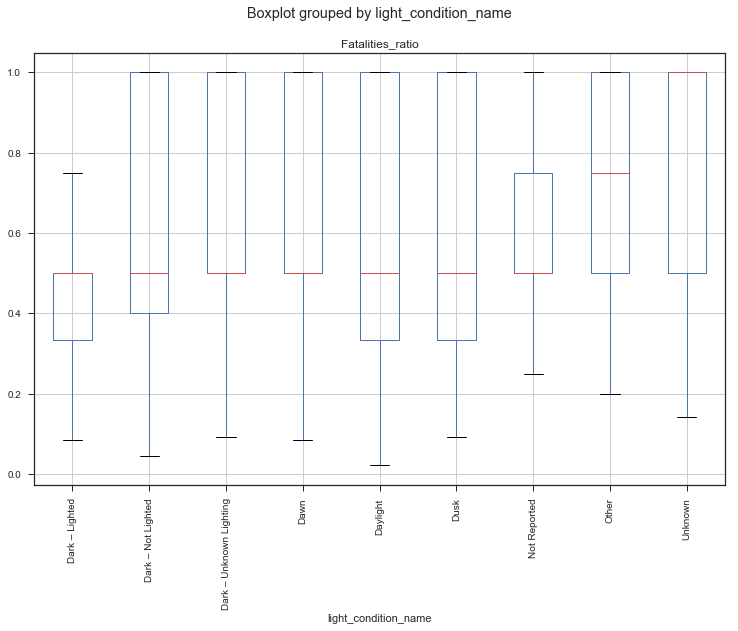

In [44]:
# Boxplot to compare the Fatality Rate vs the Light conditions
Accident_df.boxplot(column='Fatalities_ratio', by = 'light_condition_name', rot=90, figsize=(12,8))

<font color=blue>This plot shows the association between lighting conditions and fatality ratios for accidents under those conditions.

<p><p>It would appear that accidents that occur at night, but in lighted areas, tend towards being less fatal than other accident types. This may be due to the nature of roads that are lit at night: these typically include local roads in cities, and some highways, but typically not county roads or state highways (or if such roadways are lit, they are usually with less-frequent lighting).</font>

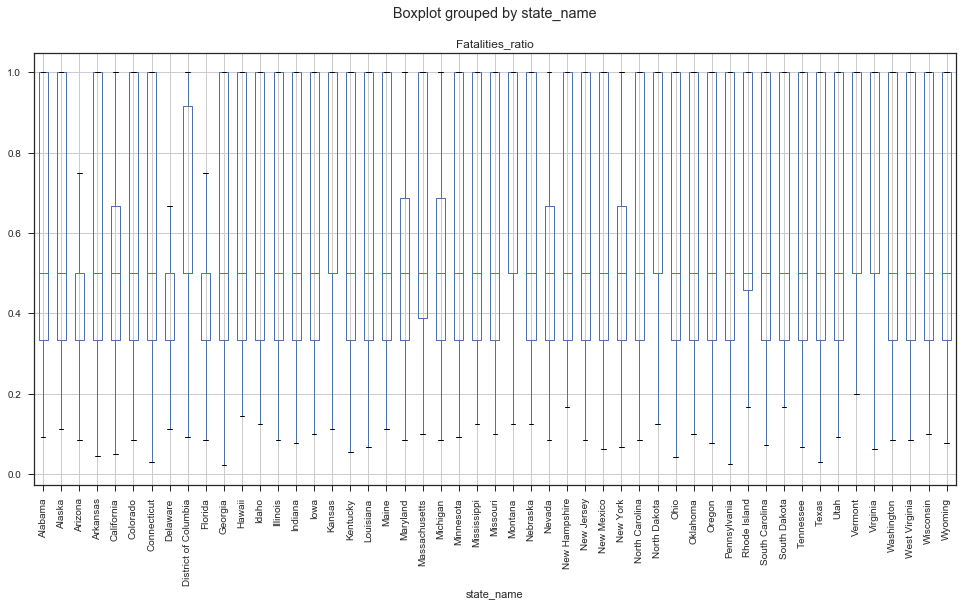

In [46]:
# Boxplot to compare the state's Fatality Rate
Accident_df.boxplot(column='Fatalities_ratio', by = 'state_name', rot=90, figsize=(16,8))

<font color=blue>This plot gives a breakdown of the fatality ratio of accidents by state.

<p><p>From this, we can see that most states are about even with each other in terms of fatality rates: only a few stick out as more or less particularly fatal.

<p><p>Arizona, Delware, and Florida all seem to be "safer" than other states, with DC, Maryland, Michigan, Nevada, and New York somewhat marginally safer than others. The remaining states all seem to be mostly the same, with a few variations but otherwise having mostly the same pattern of fatality rates.

<p><p>The precise analysis for why those states in particular have lower fatality rates than others is beyond the scope of this project. It may have something to do with additional laws, harsher penalties for failure to wear seatbelts, or perhaps some other factor; regardless, these states all differ from each other in enough ways (location, population density, and various other factors) that it would be impossible at this time to say why these differences are happening.</font>

## New Features

The 'Day_Time_Yes_No' field was added to the dataframe to reduce the dimensions to help visualize the impact of atmospheric conditions. This could also be used as a control variable in future predictions.

<font color=blue><p><p>While the data set as a whole is rather informative, there is still additional information that could be helpful. For instance, we have variables indicating if a participant in an accident was a drunk driver; other factors, such as if a participant was using a cell phone at the time of the crash, if an individual had other drugs in their system (sleep aids, opioids, or perhaps marijuana); also missing from this data is vehicle speed at the time of the accident, which would also be useful information.

<p><p>As has been mentioned throughout, more information on the drivers themselves would be incredibly useful: things like age, state of driver's license, state the vehicle was registered in, even simple things like gender would be helpful in narrowing down the causes of fatal accidents.</font>

When attempting to reduce risk in a situation as volatile as vehicle accidents, there are innumerable factors that may or may not be relevant. While the data we've worked with here is rich and informative, there is certainly more information that could be gathered to give us an even clearer picture of what happened - and having a clear picture of past accidents can give us more powerful insights into how to prevent them in the future.

In [ ]:


Accident_df['Fatalities_ratio'] = Accident_df.number_of_fatalities/(Accident_df.number_of_persons_not_in_motor_vehicles_in_transport_mvit + Accident_df.number_of_persons_in_motor_vehicles_in_transport_mvit)



## Exceptional Work
We spent extra time on coming to a deeper understanding of the relationships between the attributes and the classes. Specifically, we built a linear model for two of the attributes, between accident events and fatalities, which gave us improved insight into what was happening. 

We also graphed accident events by atmospheric conditions in a parallel coordinates plot to determine if there was separation between the various atmospheric conditions.

Ultimately, the most challenging work with this data was to get it in the correct format for visualizations, and the review of the many possible relationships between the numerous attributes, before determining which factors looked like they would be best for the sort of analysis we wanted to do.